In [5]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os 
import glob2 as gb
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
train_path = 'E:\\sasa\\English\\Hnd\\Img\\'

In [3]:
code = {'0':0, '1':1, '2':2, '3':3, '4':4,
               '5':5, '6':6, '7':7, '8':8, '9':9,
               'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16,
               'H':17, 'I':18, 'J':19, 'K':20, 'L':21, 'M':22, 'N':23,
               'O':24, 'P':25, 'Q':26, 'R':27, 'S':28, 'T':29, 'U':30,
               'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35, 'as':36, 'bs':37, 
               'cs':38, 'ds':39, 'es':40, 'fs':41, 'gs':42, 'hs':43, 'is':44, 
               'js':45, 'ks':46, 'ls':47, 'ms':48, 'ns':49, 'os':50, 'ps':51,
               'qs':52, 'rs':53, 'ss':54, 'ts':55, 'us':56, 'vs':57, 'ws':58, 
               'xs':59, 'ys':60, 'zs':61,}

def getcode(n):
    for x ,y in code.items():
        if n==y :
            return x

In [6]:
import cv2
# create x , y  
X = []
y = []

for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path) + folder + '/*png')
    for file in files :
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image_array = cv2.resize(image,(28,28))
        X.append(list(image_array))
        y.append(code[folder])


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=44)

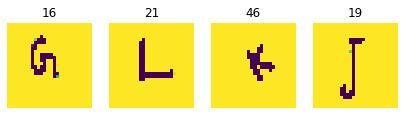

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(7, 3))
for img, label, ax in zip(X_train[:4], y_train[:4], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [10]:
X_train = np.asarray(X_train)
print(f'train images: {X_train.shape}')
y_train = np.asarray(y_train)
print(f'train labels: {y_train.shape}')
X_test= np.asarray(X_test)
print(f'test images: {X_test.shape}')
y_test= np.asarray(y_test)
print(f'test labels: {y_test.shape}')

train images: (2728, 28, 28)
train labels: (2728,)
test images: (682, 28, 28)
test labels: (682,)


In [11]:
X_train = X_train.reshape(2728, 28*28)/255
X_test = X_test.reshape(682,28*28)/255

In [12]:
y_train[:4]

array([16, 21, 46, 19])

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
with tf.Session() as sess:
        y_train = sess.run(tf.one_hot(y_train ,62))
        y_test = sess.run(tf.one_hot(y_test,62))

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
y_train[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0

In [30]:
learning_rate = 0.1
epochs = 20
batch_size = 20  
batches = int(X_train.shape[0] / batch_size)

In [31]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 62])
W = tf.Variable(tf.zeros([784,62]))
B = tf.Variable(tf.zeros(62))

In [32]:
model_output = tf.matmul(X, W) + B

In [33]:
alpha = tf.constant([0.01])
delta = tf.constant([1.0], tf.float32)

regulation_term = alpha * tf.nn.l2_loss(W) 

S_truelabel = tf.reduce_sum(tf.multiply(Y,model_output),axis=1 ,keepdims=True)
loss = tf.reduce_mean(tf.reduce_sum(tf.maximum(0.0, model_output - S_truelabel + delta), 1) - delta )
loss += regulation_term

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [35]:
def accuracy(predictions, labels):
       return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

In [36]:
#Train the model
with tf.Session() as sesh:
        sesh.run(tf.global_variables_initializer())
        
        for epoch in range(epochs):
            for i in range(batches):
                offset = i * epoch
                x = X_train[offset: offset + batch_size]
                y = y_train[offset: offset + batch_size]
                sesh.run(optimizer, feed_dict={X: X_test, Y:y_test})
                c = sesh.run(loss, feed_dict={X:x, Y:y})
            if epoch % 1 == 0 :
                acc = accuracy(sesh.run(model_output,feed_dict={X: x, Y:y}), y)
                print(f'epoch:{epoch} loss={c} Acc={acc}')
                
        # Test the model
        print('Test Accuracy = ', accuracy(sesh.run(model_output,feed_dict={X: X_test, Y:y_test}),y_test)) 
        y_pred = (sesh.run(model_output,feed_dict={X: X_test}))

epoch:0 loss=[315.6193] Acc=0.0
epoch:1 loss=[164.9148] Acc=5.0
epoch:2 loss=[217.6145] Acc=0.0
epoch:3 loss=[120.11839] Acc=20.0
epoch:4 loss=[59.816586] Acc=20.0
epoch:5 loss=[125.246735] Acc=5.0
epoch:6 loss=[139.87167] Acc=10.0
epoch:7 loss=[142.5702] Acc=10.0
epoch:8 loss=[123.17468] Acc=0.0
epoch:9 loss=[195.48524] Acc=5.0
epoch:10 loss=[139.19963] Acc=0.0
epoch:11 loss=[81.7388] Acc=10.0
epoch:12 loss=[118.66306] Acc=0.0
epoch:13 loss=[109.748856] Acc=0.0
epoch:14 loss=[99.12932] Acc=30.0
epoch:15 loss=[187.32016] Acc=0.0
epoch:16 loss=[227.64384] Acc=10.0
epoch:17 loss=[242.18292] Acc=5.0
epoch:18 loss=[127.73866] Acc=15.0
epoch:19 loss=[133.68875] Acc=10.0
Test Accuracy =  91.49560117302053


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
import seaborn as sns

In [40]:

results = confusion_matrix(y_test,y_pred)

Confusion Matrix :
[[ 6  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]


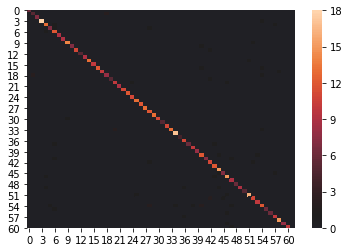

Accuracy Score : 624
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.71      0.71      0.71         7
           2       1.00      1.00      1.00         7
           3       1.00      0.95      0.97        19
           4       0.81      0.87      0.84        15
           5       0.88      0.78      0.82         9
           6       0.71      0.92      0.80        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         9
           9       0.93      0.93      0.93        15
          10       1.00      0.88      0.93         8
          11       1.00      0.92      0.96        12
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      0.93      0.96        14
          15       1.00      1.00      1.00        10
          16       1.00      0.86      0.92       

In [41]:
print ('Confusion Matrix :')
print(results) 
sns.heatmap(results,center=True)
plt.show()
print ('Accuracy Score :',accuracy_score(y_test, y_pred.round(), normalize=False))
print ('Report : ')
print (classification_report(y_test, y_pred))